In [1]:
# packages and libraries
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
# https://bionumbers.hms.harvard.edu/
# ^^ biological number dictionary

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6330087/
# ^^ table of E. coli parameters

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1563538/
# ^^ MRSA parameters

# https://www.nature.com/scitable/topicpage/antibiotic-resistance-mutation-rates-and-mrsa-28360/
# ^^ MRSA mutation rate

In [90]:
# constant parameters
b_s = 0.99      # [bacteria/hr]
b_r = 0.66      # [bacteria/hr]
d = 0.5         # [bacteria/hr]
delta = 0.35    # [bacteria/hr]

p = 0.00001
epsilon = 0.0001
a = 0.0001

K = 5000

t_c = 7*24 # [hrs]

# time-dependent parameters
def p_t(t):
  if t <= t_c:
    return p*t + epsilon
  else: return epsilon

def delta_t(t):
  if t <= t_c:
    return delta
  else: return 0

# ensure bacteria do not re-grow if < 1 (e.g. 1e-10)
def bs_t(y1):
  if y1 < 1:
    return 0
  else: return b_s

def br_t(y2):
  if y2 < 1:
    return 0
  else: return b_r

# differential equations
def system(variables,t):
  y1, y2 = variables
  N = y1 + y2

  dy1dt = (1-p_t(t))*(1-(N/K))*bs_t(y1)*y1 - a*y1*y2 - (d+delta_t(t))*y1
  dy2dt = p_t(t)*(1-(N/K))*bs_t(y1)*y1 + (1-(N/K))*br_t(y2)*y2 + a*y1*y2 - d*y2
  return [dy1dt, dy2dt]

# solver
hrs = 20*24
t = np.linspace(0, hrs, num=hrs)
initial_conditions = [100,0]
solution = odeint(system, initial_conditions, t)

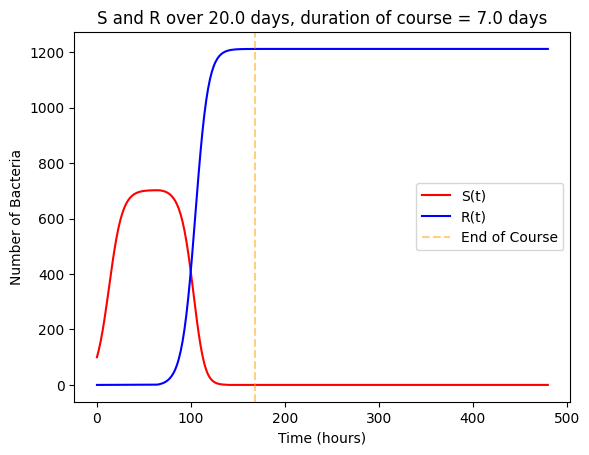

In [91]:
# Plot results
path = '/content/drive/Shareddrives/EEB 325 Final/'
filename = '7days_N1212.jpg'

plt.plot(t, solution[:,0], color='red', label='S(t)')
plt.plot(t, solution[:,1], color='blue', label='R(t)')
plt.axvline(t_c, 0, max(solution[:,0]), linestyle='--', label='End of Course', color='orange', alpha=0.5)
plt.xlabel("Time (hours)")
plt.ylabel("Number of Bacteria")
plt.title("S and R over " + str(hrs/24) + " days, duration of course = " + str(t_c/24) + " days")
plt.legend()
#plt.savefig(path + filename)
plt.show()

In [92]:
# simulation equilibrium
end_time = len(solution[:,0])-1
print("S = ", round(solution[end_time,0],1))
print("R = ", round(solution[end_time,1],1))
print("N = ", round(solution[end_time,0]+solution[end_time,1],1))

S =  -0.0
R =  1212.1
N =  1212.1


In [93]:
# theoretical equilibrium values
# S-free equilibrium
t = 300
R_star1 = K*(1-(d/b_r))
S_star1 = 0
N_star1 = R_star1 + S_star1
print("R_star, 1: ", round(R_star1,1))
print("S_star, 1: ", S_star1)
print("N_star, 1: ", round(N_star1,1))

R_star, 1:  1212.1
S_star, 1:  0
N_star, 1:  1212.1


In [94]:
# function for quadratic formula
def quad_solver(alph, bet, gam):
  x1 = (-bet + math.sqrt(bet**2 - 4*alph*gam))/(2*alph)
  x2 = (-bet - math.sqrt(bet**2 - 4*alph*gam))/(2*alph)
  return x1, x2

# coexistence equilibrium
t = len(solution[:,0])-1

# coefficients for quadratic equation
alph = ((b_r*a)/(b_s*(1-p_t(t)))) - (a*((a*K/((1-p_t(t))*b_s)) + 1)) - ((p*a/(1-p_t(t)))*((a*K/((1-p_t(t))*b_s)) + 1))
bet = ((1 - ((d+delta_t(t))/((1-p_t(t))*b_s)))*a*K*(p_t(t)/(1-p_t(t)) + 1)) - d + (((d+delta_t(t))/(1-p_t(t)))*(b_r/b_s)) - (p*((d+delta_t(t))/(1-p_t(t)))*((a*K/((1-p_t(t))*b_s)) + 1))
gam = p_t(t) * K * ((d+delta_t(t))/(1-p_t(t))) * (1 - ((d+delta_t(t))/((1-p_t(t))*b_s)))

# R_star is positive solution to quadratic formula
x1, x2 = quad_solver(alph, bet, gam)
R_star3 = max(x1,x2)
assert R_star3 >= 0

S_star3 = K*(1 - ((d+delta_t(t)+a*R_star3)/((1-p_t(t))*b_s))) - R_star3
N_star3 = R_star3 + S_star3

print("S_star, 3: ", round(S_star3,1))
print("R_star, 3: ", round(R_star3,1))
print("N_star, 3: ", round(N_star3,1))

S_star, 3:  1021.0
R_star, 3:  965.7
N_star, 3:  1986.7
